In [8]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution() # make sure sess.run works
# define a constant hello
hello = tf.constant("Hello TF boy")
# create a session
sess = tf.compat.v1.Session()
# execute constant operator print it out to console
print(sess.run(hello))

b'Hello TF boy'


In [23]:
import tensorflow.compat.v1 as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
tf.disable_v2_behavior()
# define a constant hello
hello = tf.constant("Hello TF boy")
# create a session
sess = tf.Session()
# execute constant operator print it out to console
print(sess.run(hello))

b'Hello TF boy'


In [24]:
import matplotlib.pyplot as plt

'2.3.0'

In [20]:
# TF 1 does not work on TF2
from __future__ import print_function

# import MINIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

(x_,y_),(x_1,y_1)=mnist.load_data()

import matplotlib.pyplot as plt
plt.imshow(x_[0], cmap='binary')
plt.show()


ModuleNotFoundError: No module named 'tensorflow.examples.tutorials'

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(60000, 28, 28)


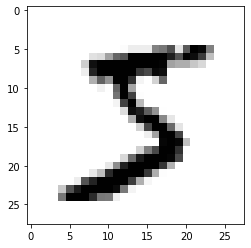

In [51]:
# use TF2 way to get mnist
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train)
print(x_train.shape)

plt.imshow(x_train[0], cmap='binary')
plt.show()


In [32]:
# hyper-parameter超参数
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

# nerual network parameter神经网络参数
n_hidden_1 = 256 # 1st layer of nerve cell's total numbers第一层神经元个数
n_hidden_2 = 256 # 2nd layer of neure's total numbers第二层神经元个数
num_input = 784 # MNIST ipuyt data, image size 28*28输入数据（图像大小28*28）
num_classes = 10 # MNIST handwritten number category 0-9 手写体数字类别

# input into the training data flow, traning data输入到数据流图中的训练数据
X = tf.placeholder("float", [None, num_input]) # TF里None可变长的动态数组，也就是128*784的数组
Y = tf.placeholder("float", [None, num_classes]) # 128个结果，可能的类型有10个



In [29]:
# weight and biases
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases={
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes])),
}

In [37]:
# 定义神经网络
def neural_net(x):
    # 第一层隐藏层（256个神经元）
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # 第二层隐藏层（256个神经元）
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # 输出层
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [38]:
# 构建模型
logits = neural_net(X)

# 定义损失函数和优化器
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# 定义预测准确率
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# 初始化所有变量（赋默认值）
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [57]:
# 开始训练
with tf.Session() as sess:
    # 实质性初始化操作
    sess.run(init)
    
    for step in range(1, num_steps + 1):
        # batch_x, bacth_y = mnist.train.next_batch(batch_size)
        batch_x, batch_y = x_train,y_train
        batch_x = batch_x.reshape(60000, 784)
        batch_y = batch_y.reshape(60000, 10)
        # 执行训练操作，包括前向和后向传播
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # 计算损失值和准确率
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x, Y: batch_y})
            
            print("Step " + str(step) + ", Minibatch Loss=0" + \
                  "{:.4f}".format(loss) + ", Traning Accuracy= " + \
                  ":.3f".format(acc))
    print("Optimization Finished!")
    
    # 计算测试数据的准确率
    print("Testing Accuracy:",\
         sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

ValueError: cannot reshape array of size 60000 into shape (60000,10)